# 1) Introduction

In this lesson, we'll learn how to handle missing data without having to drop rows and columns using data on motor vehicle collisions released by New York City and published on the [NYC OpenData website.](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95)There is data on over 1.5 million collisions dating back to 2012, with additional data continuously added.

Our data set is in a CSV called nypd_mvc_2018.csv. We can read our data into a pandas dataframe and inspect the first few rows of the data:

In [72]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/TomazFilgueira/Dq_Datascientist/refs/heads/main/04_Data_Cleaning/04_2_Advanced_data_cleaning/Data/nypd_mvc_2018.csv'
mvc = pd.read_csv(url)
mvc.head()

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
1,3847947,2018-02-13,14:45,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,62 STREET,NaN,0,0,...,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,3914294,2018-06-04,0:00,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
3,3915069,2018-06-05,6:36,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,VANLOON STREET,NaN,0,0,...,Sedan,Sedan,NaN,NaN,NaN,Glare,Passing Too Closely,NaN,NaN,NaN
4,3923123,2018-06-16,15:45,BRONX,"(40.884727, -73.89945)",NaN,NaN,208 WEST 238 STREET,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Turning Improperly,Unspecified,NaN,NaN,NaN


A summary of the columns and their data is below:

* `unique_key`: A unique identifier for each collision.
* `date`, `time`: Date and time of the collision.
* `borough`: The borough, or area of New York City, where the collision occurred.
* `location`: Latitude and longitude coordinates for the collision.
* `on_street`, `cross_street`, `off_street`: Details of the street or intersection where the collision occurred.
* `pedestrians_injured`: Number of pedestrians who were injured.
* `cyclist_injured`: Number of people traveling on a bicycle who were injured.
* `motorist_injured`: Number of people traveling in a vehicle who were injured.
* `total_injured`: Total number of people injured.
* `pedestrians_killed`: Number of pedestrians who were killed.
* `cyclist_killed`: Number of people traveling on a bicycle who were killed.
* `motorist_killed`: Number of people traveling in a vehicle who were killed.
* `total_killed`: Total number of people killed.
* `vehicle_1` through `vehicle_5`: Type of each vehicle involved in the accident.
* `cause_vehicle_1` through `cause_vehicle_5`: Contributing factor for each vehicle in the accident.

## Example - Counting missing values

In [38]:
data = np.random.choice([1.0, np.nan],
                        size=(3, 3),
                        p=[0.3, 0.7])
df = pd.DataFrame(data, columns=['A','B','C'])
print(df)

print(df.isnull())

    A    B   C
0 NaN  1.0 NaN
1 NaN  NaN NaN
2 NaN  NaN NaN
      A      B     C
0  True  False  True
1  True   True  True
2  True   True  True


In [39]:
#We can chain the result to DataFrame.sum() method to count the number of null values in each column
print(df.isnull().sum())

A    3
B    2
C    3
dtype: int64


## Instructions
We have read the CSV file into a pandas dataframe called mvc.

Create a series that counts the number of null values in each of the columns in the `mvc` dataframe. Assign the result to `null_counts`.

In [40]:
null_counts = mvc.isnull().sum()
null_counts

date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64

# 2) Verifying the Total Columns

To give us a better picture of the null values in the data, let's calculate the percentage of null values in each column. Below, we **divide** the number of null values in each column by the **total number of values** in the data set.

We'll then add both the `counts` and `percentages` to a dataframe to make them easier to compare:

In [41]:
null_counts_pct = null_counts / mvc.shape[0] * 100

null_df = pd.DataFrame({'null_counts': null_counts, 'null_pct': null_counts_pct})
# Rotate the dataframe so that rows become columns and vice-versa
null_df = null_df.T.astype(int)
null_df

,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,motorist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
null_counts,0,0,20646,3885,13961,29249,44093,0,0,0,...,355,12262,54352,57158,57681,175,8692,54134,57111,57671
null_pct,0,0,35,6,24,50,76,0,0,0,...,0,21,93,98,99,0,15,93,98,99


To make things easier, let's start by looking at the group of columns that relate to people **killed in collisions**.

We'll use list comprehension to reduce our summary dataframe to just those columns:

In [42]:
killed_cols = [col for col in mvc.columns if 'killed' in col]
print(null_df[killed_cols])

             pedestrians_killed  cyclist_killed  motorist_killed  total_killed
null_counts                   0               0                0             5
null_pct                      0               0                0             0


We can see that each of the individual categories have no missing values, but the `total_killed` column has **five** missing values.

The total number of people killed should be the **sum** of each of the individual categories. We might be able to "fill in" the missing values with the sums of the individual columns for that row. The technical name for filling in a missing value with a replacement value is called **imputation**.

Let's look at how we could explore the values where the `total_killed` **isn't equal** to the sum of the other three columns. 

Select just the first three columns, and manually sum each row:
![Alt text](https://s3.amazonaws.com/dq-content/370/verify_totals_2.svg)

We then compare the **manual sum** to the original `total` column to create a boolean `mask` where equivalent values **are not equal**:

![Alt text](https://s3.amazonaws.com/dq-content/370/verify_totals_3.svg)

Lastly, we use the boolean mask to filter the original dataframe to include only rows where the manual sum and original **aren't equal**:

![Alt text](https://s3.amazonaws.com/dq-content/370/verify_totals_4.svg)

## Instructions

We created a dataframe `killed`, containing the five columns that relate to people killed in collisions.

1. Select the first three columns from `killed` and sum each row. Assign the result to `killed_manual_sum`.

1. Create a boolean mask that checks whether each value in `killed_manual_sum` is not equal to the values in the `total_killed` column. Assign the boolean mask to `killed_mask`.

1. Use `killed_mask` to filter the rows in `killed`. Assign the result to `killed_non_eq`.


In [43]:
killed_cols = [col for col in mvc.columns if 'killed' in col]
killed = mvc[killed_cols].copy()

killed_manual_sum = killed.iloc[:,:3].sum(axis=1)
killed_mask = killed_manual_sum != killed['total_killed']

#identifying columns that sum does not match with total sum
killed_non_eq = killed[killed_mask]
killed_non_eq


,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
unique_key,,,,
4026451,0,0,0,NaN
4028365,0,0,0,NaN
4026317,0,0,1,0.0
4026219,0,0,0,NaN
4026434,0,0,0,NaN
4026403,0,0,0,NaN


# 3) Filling and Verifying the Killed and Injured 

We can categorize the dataframde into two categories:

1. Five rows where the `total_killed` is not equal to the sum of the other columns because the total value is missing.

1.One row where the `total_killed` is less than the sum of the other columns.

From this, we can conclude that filling null values with the sum of the columns is a fairly good choice for our **imputation**.

In order to execute this, we'll learn to use the `Series.mask()` method. `Series.mask()` is useful when you want to replace certain values in a series based off a boolean mask. The syntax for the method is:

```
Series.mask(bool_mask, val_to_replace)
```



## Example:

Let's look at an example with some simple data. We'll start with a series called `fruits`:

![Alt text](https://s3.amazonaws.com/dq-content/370/mask_1.svg)

Next, we create a boolean series that matches values equal to the string `Banana`:

![Alt text](https://s3.amazonaws.com/dq-content/370/mask_2.svg)

Lastly, we use `Series.mask()` to replace all the values that match the boolean series with a new value, `Pear`

![Alt text](https://s3.amazonaws.com/dq-content/370/mask_3.svg)



Let's look at how we'd use this technique to update the values in the `total_killed` column. First, we'll replace all `null` values with the equivalent values from our `killed_manual_sum` series:

In [44]:
killed_null = killed['total_killed'].isnull()
killed['total_killed'] = killed['total_killed'].mask(killed_null, killed_manual_sum)

Next, we'll replace any values where the **manual sum** and the **total column** **aren't equal** with np.nan. This time we'll define the boolean series directly into `Series.mask()`:

In [45]:
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)
print(killed[killed_mask])

            pedestrians_killed  cyclist_killed  motorist_killed  total_killed
unique_key                                                                   
4026451                      0               0                0           0.0
4028365                      0               0                0           0.0
4026317                      0               0                1           NaN
4026219                      0               0                0           0.0
4026434                      0               0                0           0.0
4026403                      0               0                0           0.0


We've gone from five null values to **one**, and flagged some suspicious data. Let's do the same for the `injured` columns.

## Instructions

1. Use `Series.mask()` to replace any **null** values from the `total_injured` column with their equivalents from the `injured_manual_sum` series.

1. Use `Series.mask()` to replace any **numbers** from `total_injured` that aren't equal to their equivalents in `injured_manual_sum` with np.nan.

In [46]:
# Create a killed dataframe and manually sum values
killed_cols = [col for col in mvc.columns if 'killed' in col]
killed = mvc[killed_cols].copy()
killed_manual_sum = killed.iloc[:, :3].sum(axis=1)

# fix the killed values
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'].isnull(), killed_manual_sum)
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)

# Create an injured dataframe and manually sum values
injured = mvc[[col for col in mvc.columns if 'injured' in col]].copy()
injured_manual_sum = injured.iloc[:, :3].sum(axis=1)

#identifyin null values in injured
injured_null = injured['total_injured'].isnull()

injured['total_injured'] = injured['total_injured'].mask(injured_null, injured_manual_sum)

injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'] != injured_manual_sum,np.nan)

print(injured['total_injured'].isnull().sum())



21


# 4 Assigning the Corrected Data Back to the Main Dataframe

Let's summarize the count of null values before and after our changes:

In [47]:
summary = {
    'injured': [
        mvc['total_injured'].isnull().sum(),
        injured['total_injured'].isnull().sum()
    ],
    'killed': [
        mvc['total_killed'].isnull().sum(),
        killed['total_killed'].isnull().sum()
    ]
}
print(pd.DataFrame(summary, index=['before','after']))

        injured  killed
before        1       5
after        21       1


For the `total_killed` column, the number of values has **gone down from 5 to 1**. For the `total_injured` column, the number of values has actually **gone up — from 1 to 21**. This might sound like we've done the opposite of what we set out to do, but what we've actually done is **fill all the null values** and identify values that have suspect data. This will make any analysis we do on this data more accurate in the long run.

## Instructions

Let's assign the values from the `killed` and injured `dataframe` back to the main `mvc` dataframe:

In [48]:
mvc['total_injured'] = injured['total_injured']
mvc['total_killed'] = killed['total_killed']
                        

# 5 Visualizing Missing Data with Plots

The function below uses `seaborn.heatmap()` to represent null values as **light** squares and non-null values as **dark squares**:

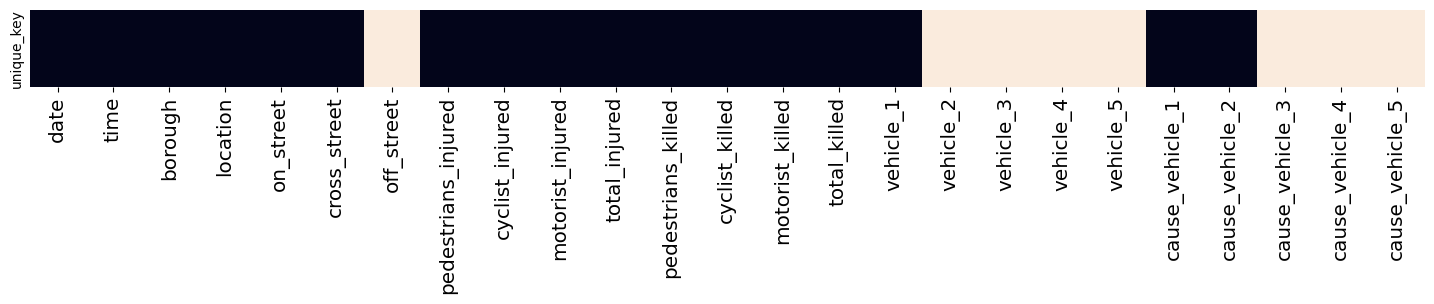

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_null_matrix(df, figsize=(18,15)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(df_null, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()

#We'll display the first row of MVC
plot_null_matrix(mvc.head(1), figsize=(18,1))

Each value is represented by a dark square, and each missing value is represented by a light square.

In [50]:
mvc.head(1)

,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,motorist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
unique_key,,,,,,,,,,,,,,,,,,,,,
3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN


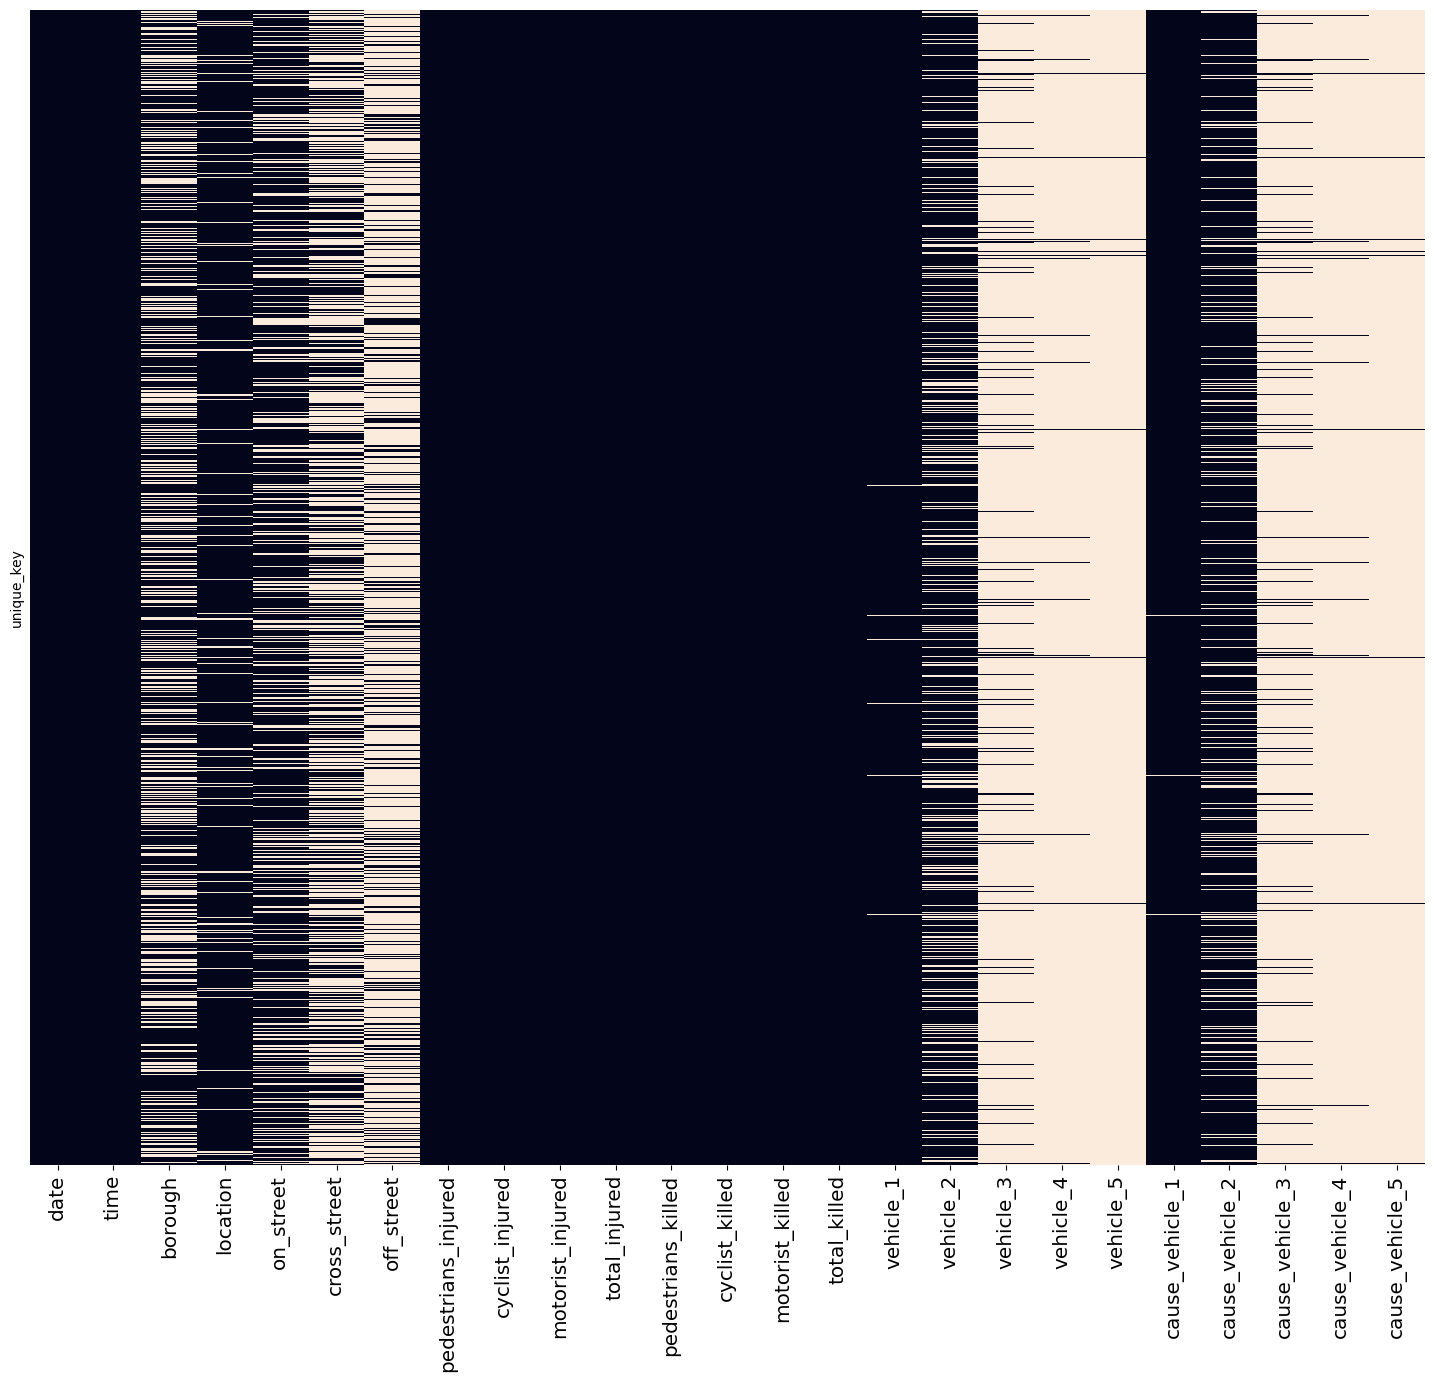

In [51]:
plot_null_matrix(mvc)

We can make some immediate interpretations about our dataframe:

* The **first three columns** have few to no missing values.
* The **next five columns** have missing values scattered throughout, with each column seeming to have its own density of missing values.
* The **next eight columns** are the injury and killed columns we just cleaned, and only have a few missing values.
* The **last 10 columns** seem to break into two groups of five, with each group of five having similar patterns of null/non-null values.

Let's examine the pattern in the last 10 columns a little more closely. We can calculate the relationship between two sets of columns, known as correlation. To calculate this we use the `dataframe.corr()` method

In [52]:
cols_with_missing_vals = mvc.columns[mvc.isnull().sum() > 0]
missing_corr = mvc[cols_with_missing_vals].isnull().corr()
print(missing_corr)

                  borough  location  on_street  cross_street  off_street  \
borough          1.000000  0.190105  -0.350190      0.409107    0.362189   
location         0.190105  1.000000  -0.073975     -0.069719    0.084579   
on_street       -0.350190 -0.073975   1.000000      0.557767   -0.991030   
cross_street     0.409107 -0.069719   0.557767      1.000000   -0.552763   
off_street       0.362189  0.084579  -0.991030     -0.552763    1.000000   
total_injured   -0.002827 -0.001486   0.006220      0.002513   -0.004266   
total_killed     0.005582  0.015496  -0.002344      0.004112    0.002323   
vehicle_1       -0.018325 -0.010466  -0.001889     -0.017018    0.001812   
vehicle_2       -0.077516 -0.033842   0.119647      0.043799   -0.121129   
vehicle_3       -0.061932 -0.000927   0.020867     -0.049910   -0.022404   
vehicle_4       -0.020406  0.004655   0.004172     -0.021137   -0.004074   
vehicle_5       -0.010733 -0.005797  -0.002768     -0.012003    0.002492   
cause_vehicl

## Instructions

It's been created a function, `plot_null_correlations()`, which will plot correlations between null values in a dataframe.

1. Use list comprehension to produce a list of column names containing the substring `'vehicle'`.

1. Use the list of column names to select only those columns from the mvc dataframe. Pass the result to the `plot_null_correlations()` function.

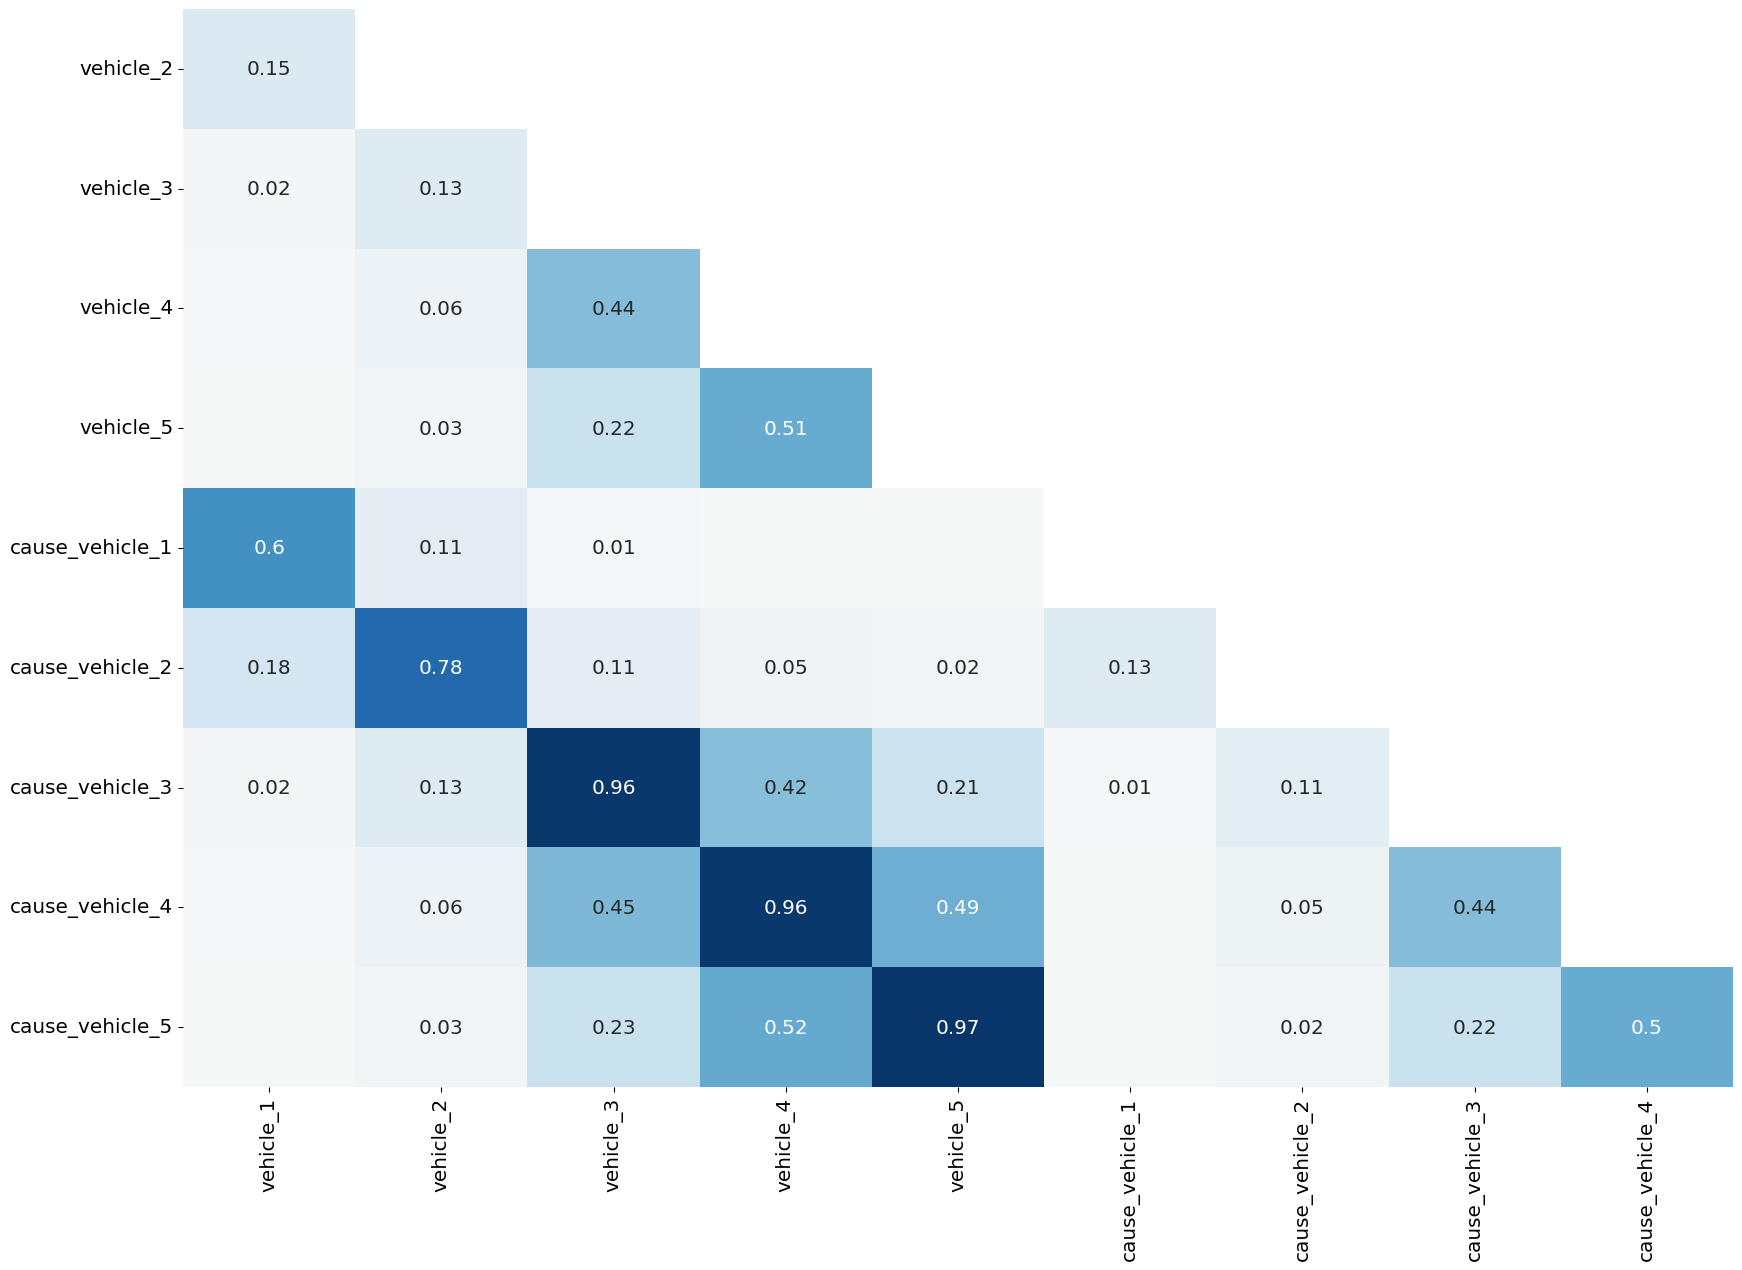

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least
    # one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a mask to avoid repeated values and make
    # the plot easier to read
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()

mask_vehicle = [col for col in mvc.columns if 'vehicle' in col]

plot_null_correlations(mvc[mask_vehicle])

# 6  Analyzing Correlations in Missing Data

 The pairs of column names that make up these five correlations are:

1. `vehicle_1` and `cause_vehicle_1`
1. `vehicle_2` and `cause_vehicle_2`
1. `vehicle_3` and `cause_vehicle_3`
1. `vehicle_4` and `cause_vehicle_4`
1. `vehicle_5` and `cause_vehicle_5`

Let's explore the variations in missing values from these five pairs of columns. We'll create a dataframe that counts, for each pair:

* The number of values where the **vehicle is missing** when the **cause is not missing**.
* The number of values where the **cause is missing** when the **vehicle is not missing**.

## Instructions

1. Add code to the body of the loop that will:

    * Count the number of rows where the `v_col` column is null and the `c_col` column is not null. Assign the result to `v_null`.

    * Count the number of rows where the `c_col` column is null and the `v_col` column is not null. Assign the result to `c_null`.

    * Append an item to the `vc_null_data` list. The item should be a list containing, in order: v, `v_null`, `c_null`.

1. Outside the loop, create a dataframe using the vc_null_data list of lists.

    * Use the `columns` parameter and the `col_labels` list to set the column names of the dataframe.
    * Assign the dataframe to `vc_null_df`.


In [54]:
col_labels = ['v_number', 'vehicle_missing', 'cause_missing']

vc_null_data = []

for v in range(1,6):
    v_col = f'vehicle_{v}'
    c_col = f'cause_vehicle_{v}'
    v_null = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
    c_null = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()
    vc_null_data.append([v,v_null,c_null])

vc_null_df = pd.DataFrame(vc_null_data,columns=["v_number","vehicle_missing","cause_missing"])
vc_null_df

,v_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


# 7) Finding the Most Common Values Across Multiple Columns

The analysis we did on the previous screen indicates that there are roughly **4,500 missing values** across the 10 columns. The easiest option for handling these would be to drop the rows with missing values. This would mean **losing almost 10%** of the total data, which is something we ideally want to avoid.

A better option is to **impute** the data, like we did earlier. One common option when imputing is to use the **most common value** to fill in data. Let's look at the common values across these columns and see if we can use that to make a decision.

We've previously used the `Series.value_counts()` method to find the most common values in a single column. In this case, we want to find the **most common values across multiple columns**. In order to do this, we first need to convert our dataframe of multiple columns into one single column, and then we can use `Series.value_counts()` to count the items.

To **convert a dataframe to a single column** of values, we use the `DataFrame.stack()` method, which stacks a dataframe object into a Series object.

![Alt text](https://s3.amazonaws.com/dq-content/370/stack_count_1.svg)


![Alt text](https://s3.amazonaws.com/dq-content/370/stack_count_2.svg)


This series object actually has **two row indexes**. The first index is the **original row index**, and the second contains the **columns** that correspond to the value.

Once we have this stacked series, we can just use `Series.value_counts()` to count the values:

![Alt text](https://s3.amazonaws.com/dq-content/370/stack_count_3.svg)



Let's use this technique to count the most common values for the `cause` set of columns. We'll start by selecting only the columns containing the substring `cause`.

In [55]:
cause_cols = [c for c in mvc.columns if "cause_" in c]
cause = mvc[cause_cols]
cause.head()

,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
unique_key,,,,,
3869058,Following Too Closely,Unspecified,NaN,NaN,NaN
3847947,Backing Unsafely,Unspecified,NaN,NaN,NaN
3914294,Following Too Closely,Unspecified,NaN,NaN,NaN
3915069,Glare,Passing Too Closely,NaN,NaN,NaN
3923123,Turning Improperly,Unspecified,NaN,NaN,NaN


In [56]:
#we'll stack the values into a single series object:
cause_1d = cause.stack()
print(cause_1d.head())

unique_key                 
3869058     cause_vehicle_1    Following Too Closely
            cause_vehicle_2              Unspecified
3847947     cause_vehicle_1         Backing Unsafely
            cause_vehicle_2              Unspecified
3914294     cause_vehicle_1    Following Too Closely
dtype: object


In [57]:
#Finally, we count the values in the series:
cause_counts = cause_1d.value_counts()
top10_causes = cause_counts.head(10)
print(top10_causes)

Unspecified                       57481
Driver Inattention/Distraction    17650
Following Too Closely              6567
Failure to Yield Right-of-Way      4566
Passing or Lane Usage Improper     3260
Passing Too Closely                3045
Backing Unsafely                   3001
Other Vehicular                    2523
Unsafe Lane Changing               2372
Turning Improperly                 1590
Name: count, dtype: int64


The most common non-null value for the **cause columns** is `Unspecified`, which presumably indicates that the officer reporting the collision was unable to determine the cause for that vehicle.

## Instructions

Let's use the same technique to identify the most common non-null value for the **vehicle columns**.

It's been provided a list comprehension that identifies columns starting with the substring `vehicle`.

1. Create a dataframe containing only the columns from `mvc`, identified by the list comprehension `v_cols`.
1. Use `DataFrame.stack()` to stack the values from the dataframe into a single series object.
1. Use `Series.value_counts()` to count the unique values from the stacked series. Assign the first 10 values to `top10_vehicles`.

In [58]:
v_cols = [c for c in mvc.columns if c.startswith("vehicle")]

#Create a dataframe containing only the columns from mvc, identified by the list comprehension v_cols.
vehicles = mvc[v_cols]

#Create stack dataframe
vehicles_1d = vehicles.stack()

#Count most commom values
vehicles_counts = vehicles_1d.value_counts()
top10_vehicles = vehicles_counts.head(10)

top10_vehicles

Sedan                                  33133
Station Wagon/Sport Utility Vehicle    26124
PASSENGER VEHICLE                      16026
SPORT UTILITY / STATION WAGON          12356
Taxi                                    3482
Pick-up Truck                           2373
TAXI                                    1892
Box Truck                               1659
Bike                                    1190
Bus                                     1162
Name: count, dtype: int64

# 8)Filling Unknown Values with a Placeholder

The top "cause" is an "`Unspecified`" placeholder. This is useful instead of a null value as it makes the distinction between a value that is missing because there were only a certain number of vehicles in the collision versus one that is because the contributing cause for a particular vehicle is unknown.

The vehicles columns don't have an equivalent, but we can still use the same technique:

1. For values where the **vehicle is null** and the **cause is non-null**, set the vehicle to `Unspecified`.
1. For values where the **cause is null** and the **vehicle is not-null**, set the cause to `Unspecified`.

We can use `Series.mask()` to replace the values, just like we did earlier in the lesson. Let's look at code to perform this for the `vehicle_1` and `vehicle_cause_1` columns:



In [59]:
# create a mask for each column
v_missing_mask = mvc['vehicle_1'].isnull() & mvc['cause_vehicle_1'].notnull()
c_missing_mask = mvc['cause_vehicle_1'].isnull() & mvc['vehicle_1'].notnull()

# replace the values matching the mask for each column
mvc['vehicle_1'] =  mvc['vehicle_1'].mask(v_missing_mask, "Unspecified")
mvc['cause_vehicle_1'] =  mvc['cause_vehicle_1'].mask(c_missing_mask, "Unspecified")

Now let's use a loop to fill in these values across all columns. It's been created a helper function `summarize_missing()` which contains the logic we used earlier to **count missing** values across the pairs of columns.



## Instructions

1. Add code to the body of the loop that:

    * Creates a boolean mask for values where the vehicle column is null and the cause column is non-null.
    * Creates a boolean mask for values where the cause column is null and the vehicle column is non-null.
    * Uses the first boolean mask to fill matching values from the vehicle column with the string Unspecified.
    * Uses the second boolean mask to fill matching values from the cause column with the string Unspecified.

1. Outside the loop, use the `summarize_missing()` function to check that you have removed all matching values. Assign the result to `summary_after.`

In [60]:
def summarize_missing(mvc):
    v_missing_data = []

    for v in range(1,6):
        v_col = f'vehicle_{v}'
        c_col = f'cause_vehicle_{v}'

        v_missing = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
        c_missing = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()

        v_missing_data.append([v, v_missing, c_missing])

    col_labels = ["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data, columns=col_labels)

summary_before = summarize_missing(mvc)

for v in range(1,6):
    v_col = f"vehicle_{v}"
    c_col = f"cause_vehicle_{v}"
    
    # create a mask for each column
    v_missing_mask = mvc[v_col].isnull() & mvc[c_col].notnull()
    c_missing_mask = mvc[c_col].isnull() & mvc[v_col].notnull()
    
    # replace the values matching the mask for each column
    mvc[v_col] =  mvc[v_col].mask(v_missing_mask, "Unspecified")
    mvc[c_col] =  mvc[c_col].mask(c_missing_mask, "Unspecified")
    
summary_after = summarize_missing(mvc)
summary_after  

,vehicle_number,vehicle_missing,cause_missing
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


# 9) Missing Data in the "Location" Columns

Let's view the work we've done across the past few screens by looking at the null correlation plot for the last 10 columns:


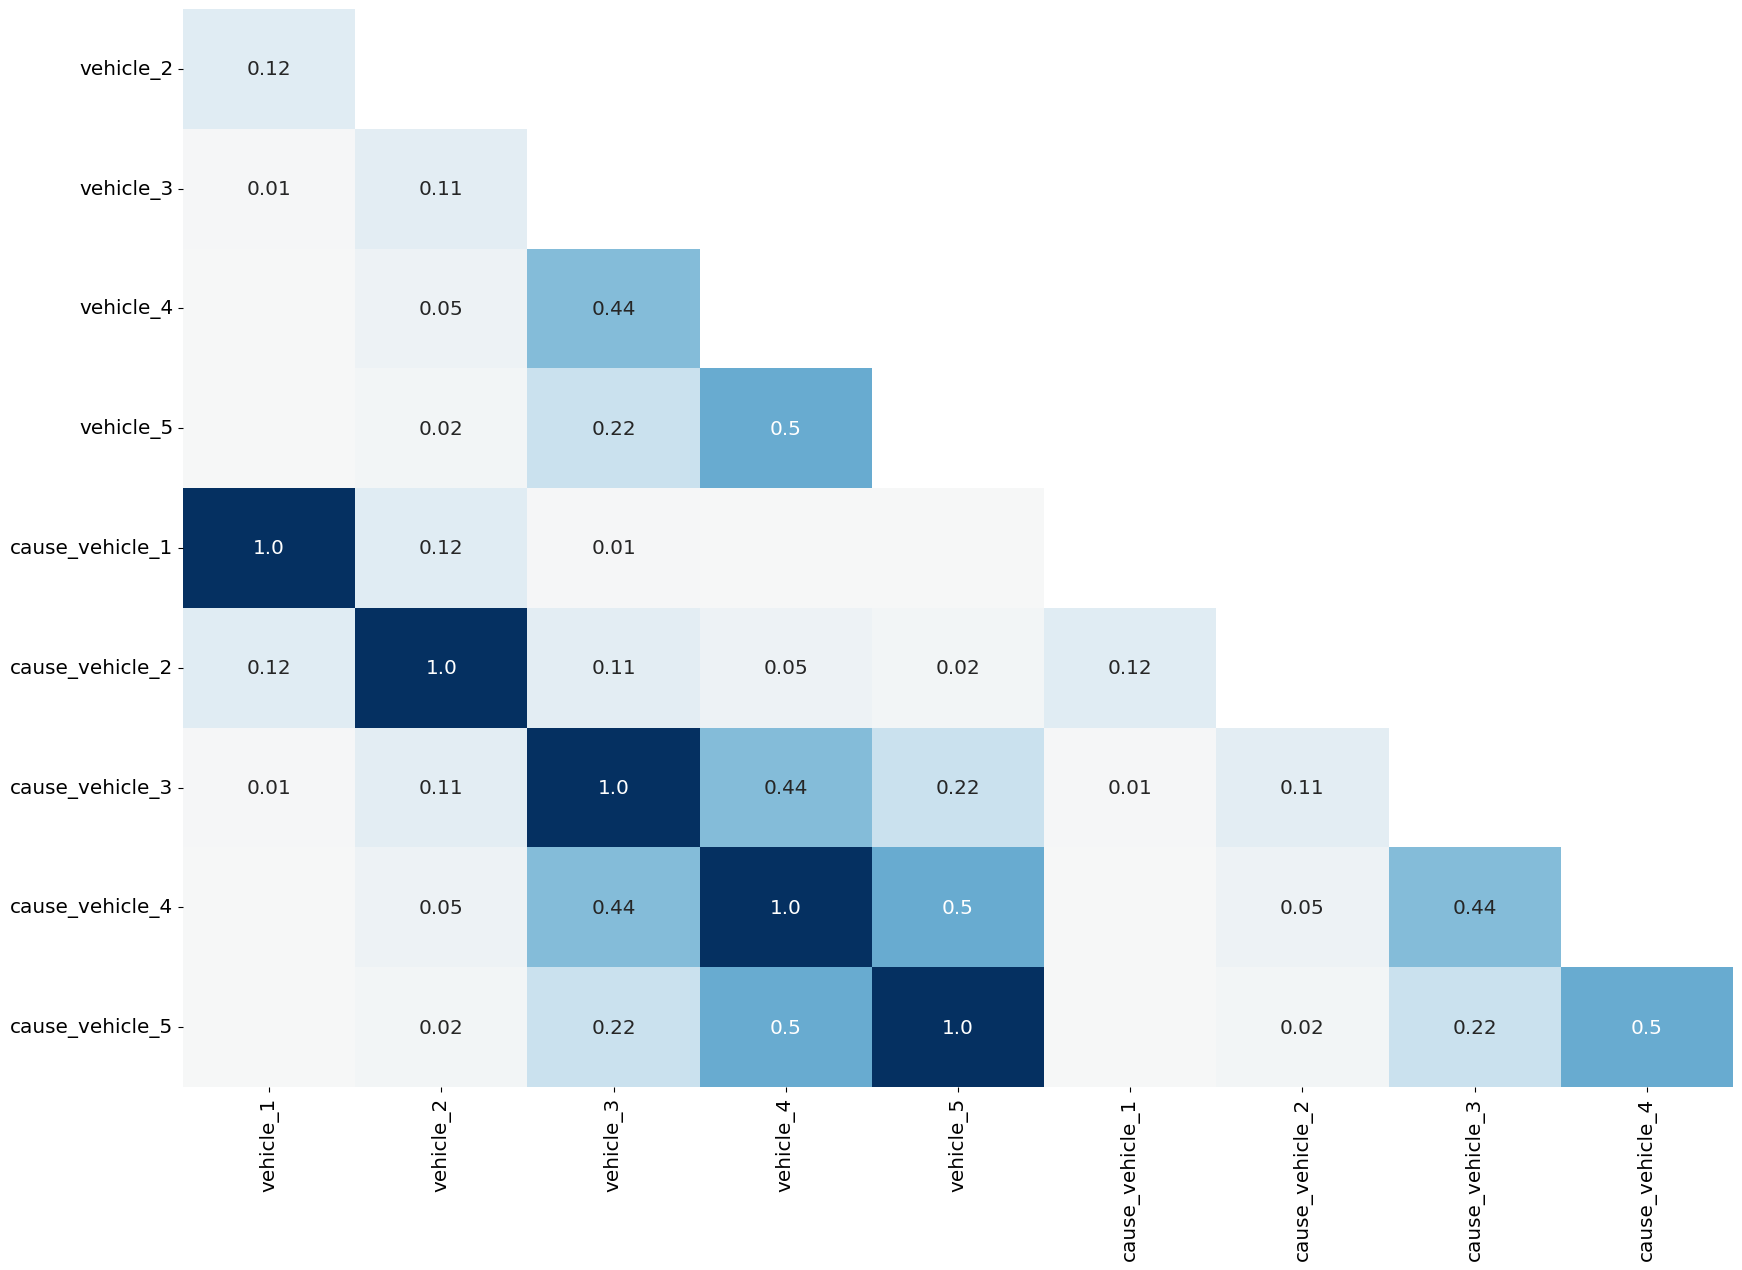

In [61]:
veh_cols = [c for c in mvc.columns if 'vehicle' in c]
plot_null_correlations(mvc[veh_cols])

You can see the perfect correlation between each pair of vehicle/cause columns represented by 
1.0 in each square, which means that there is a perfect relationship between the **five pairs of vehicle/cause columns.**

Let's now turn our focus to the final set of columns that contain missing values — the columns that relate to the **location of the accident**.

In [62]:
loc_cols = ['borough', 'location', 'on_street', 'off_street', 'cross_street']
location_data = mvc[loc_cols]
location_data.head()

,borough,location,on_street,off_street,cross_street
unique_key,,,,,
3869058,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,NaN,10 AVENUE
3847947,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,NaN,62 STREET
3914294,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN
3915069,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,NaN,VANLOON STREET
3923123,BRONX,"(40.884727, -73.89945)",NaN,208 WEST 238 STREET,NaN


In [63]:
#look at counts of the null values in each column:
print(location_data.isnull().sum())

borough         20646
location         3885
on_street       13961
off_street      44093
cross_street    29249
dtype: int64


These columns have a lot of missing values! Keep in mind that all of these five columns represent the same thing — **the location of the collision**. We can potentially use the **non-null** values to **impute** some of the null values.

To see where we might be able to do this, let's look for correlations between the missing values:

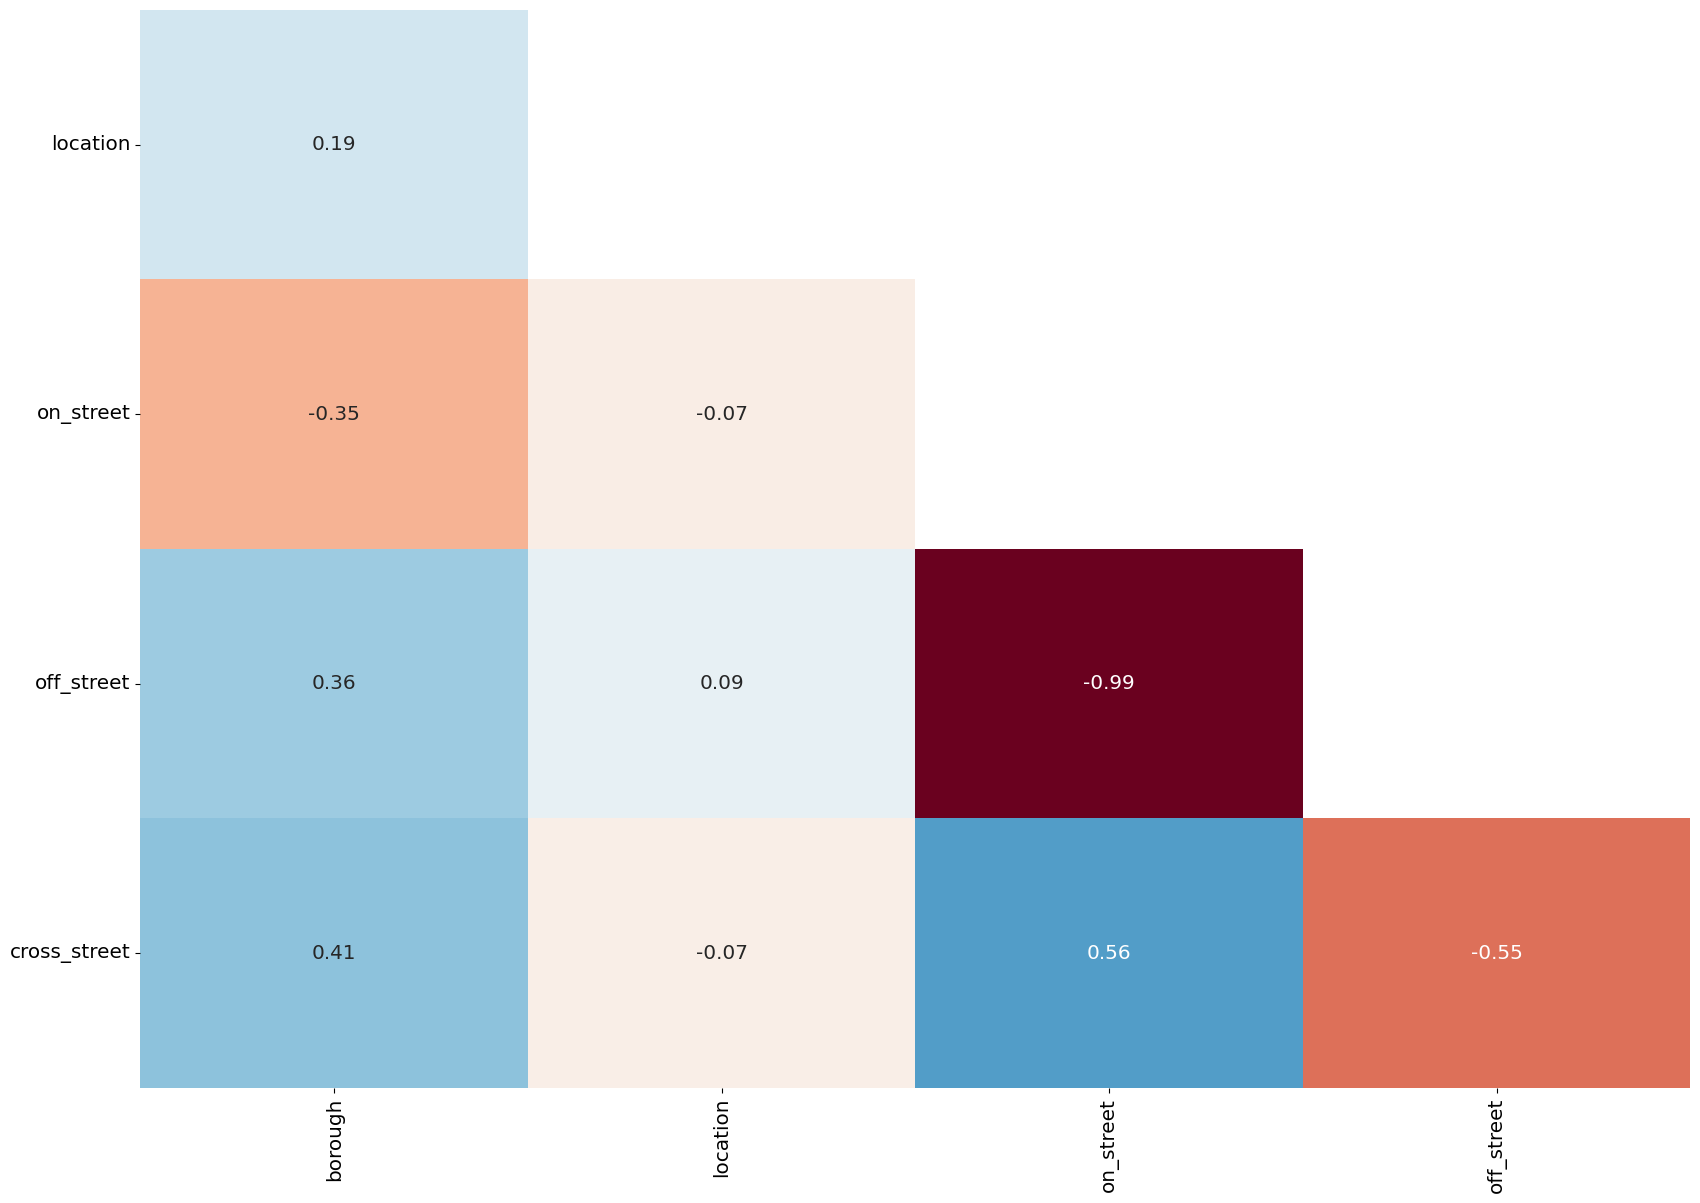

In [64]:
plot_null_correlations(location_data)

None of these columns have strong correlations except for `off_street` and `on_street` which have a near perfect *negative* correlation. That means for almost every row that has a null value in one column, the other has a non-null value and vice-versa.

The final way we'll look at the null values in these columns is to plot a null matrix, but we'll sort the data first. This will gather some of the null and non-null values together and make patterns more obvious:

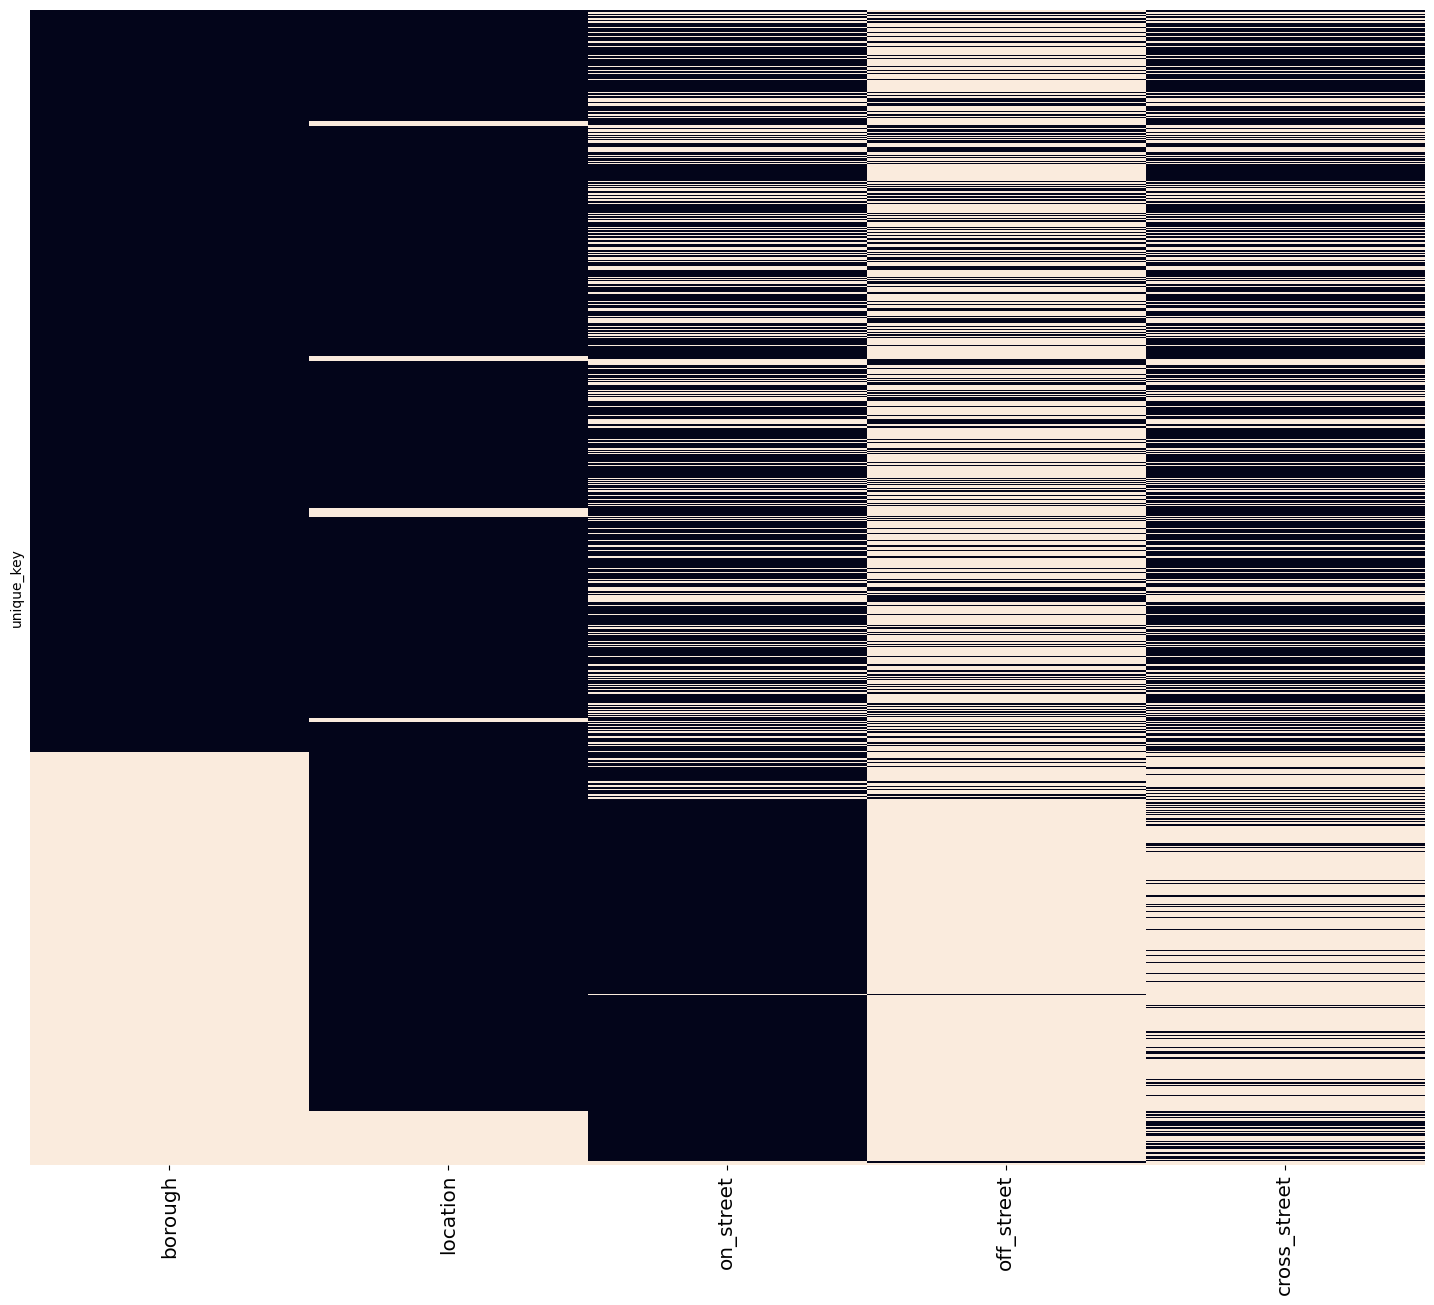

In [65]:
sorted_location_data = location_data.sort_values(loc_cols)
plot_null_matrix(sorted_location_data)

Let's make some observations about the missing values across these columns:

1. About two-thirds of rows have non-null values for `borough`, but of those values that are missing, most have non-null values for `location` and one or more of the `street name` columns.

1. Less than one-tenth of rows have missing values in the `location` column, but most of these have non-null values in one or more of the `street name` columns.

1. Most rows have a non-null value for either `on_street` or `off_street`, and some also have a value for `cross_street`.

Combined, this means that we will be able to impute a lot of the missing values by using the other columns in each row. To do this, we can use `geolocation APIs` that take either an address or location coordinates, and return information about that location.

# 10) Inputing Location Data

It's been prepared the supplemental data using the [GeoPy](https://geopy.readthedocs.io/en/latest/) package, which makes working with Geocoding APIs like the Google Maps API easier. Here's the strategy we used to prepare the supplemental data:

* For rows with `location` values but missing values in either `borough` or the `street name` columns, we used geocoding APIs to look up the **location coordinates** to find the missing data.

* For rows with values in the `street name` columns missing `borough` and/or `location` data, we used geocoding APIs to look up the **address** to find the missing data.



In [75]:
url = 'https://raw.githubusercontent.com/TomazFilgueira/Dq_Datascientist/refs/heads/main/04_Data_Cleaning/04_2_Advanced_data_cleaning/Data/supplemental_data.csv'
sup_data = pd.read_csv(url)
sup_data.head()

,unique_key,location,on_street,off_street,borough
0,3869058,NaN,NaN,NaN,NaN
1,3847947,NaN,NaN,NaN,NaN
2,3914294,NaN,BELT PARKWAY,NaN,BROOKLYN
3,3915069,NaN,NaN,NaN,NaN
4,3923123,NaN,NaN,NaN,NaN


The supplemental data has five columns from our original data set — the `unique_key` that identifies each collision, and four of the five location columns. The `cross_street` column is not included because the geocoding APIs we used don't include data on the nearest cross street to any single location.

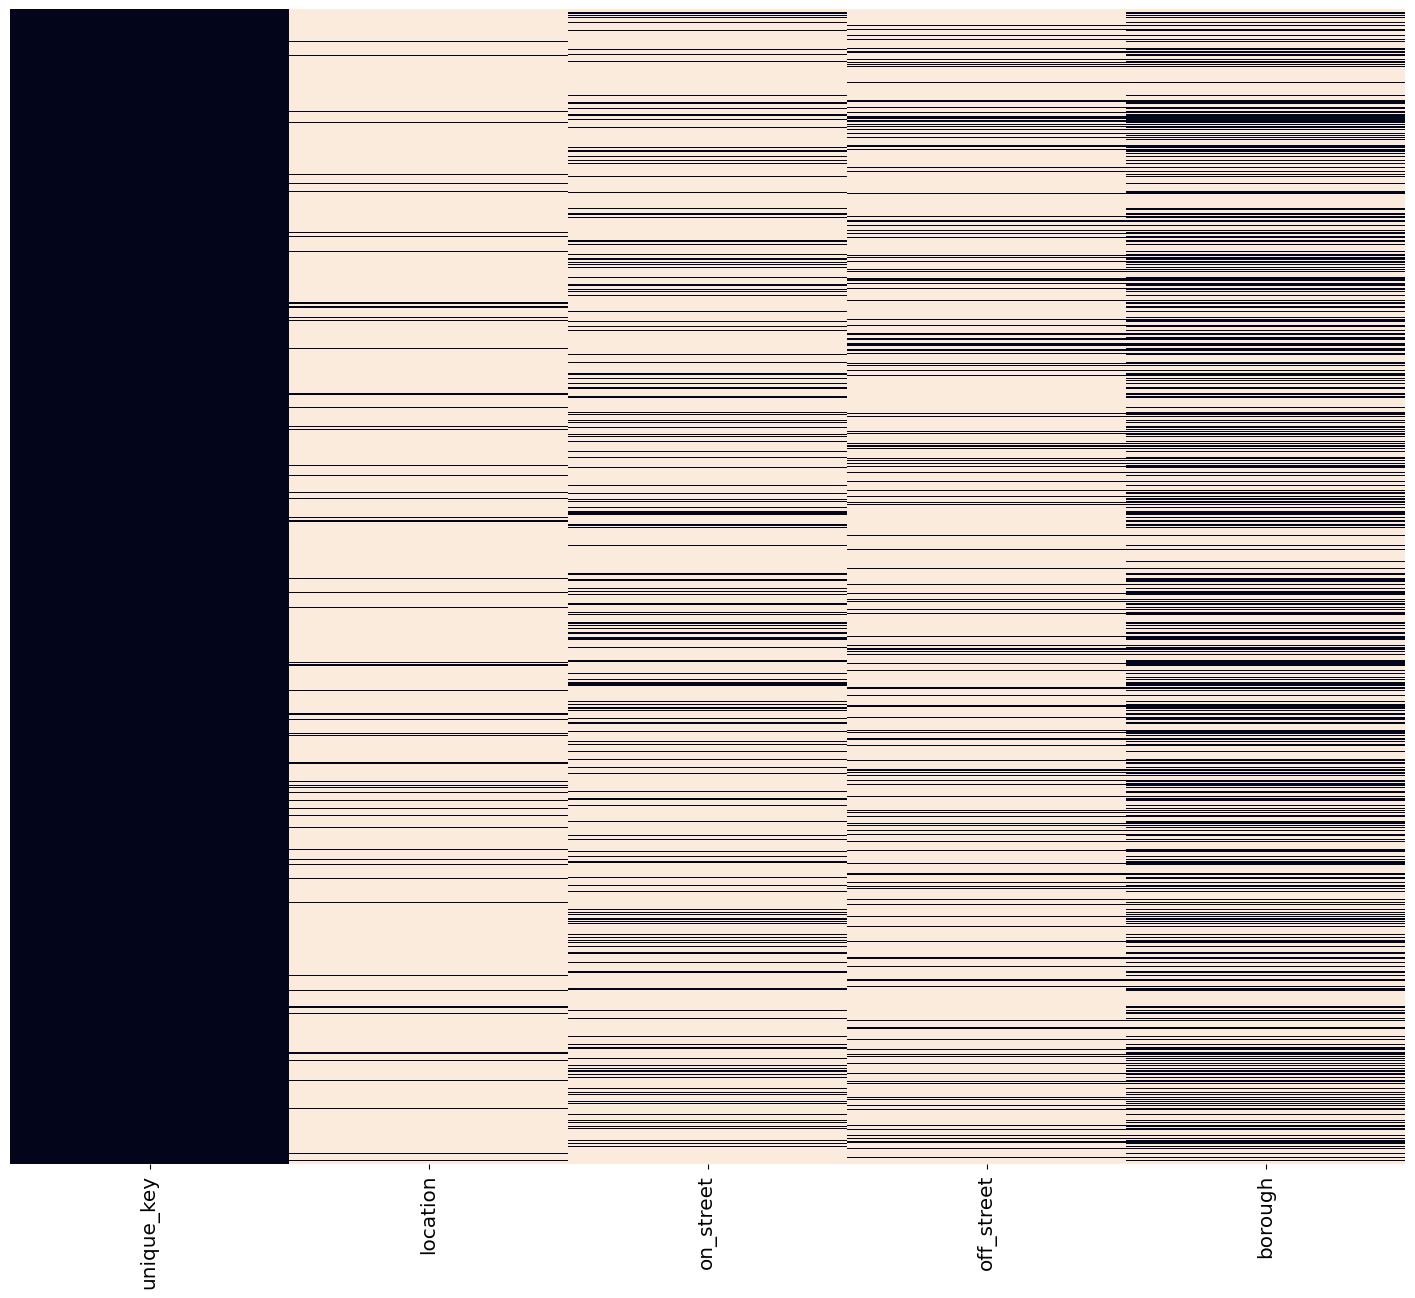

In [69]:
#take a look at a null matrix for the supplemental data:
plot_null_matrix(sup_data)

Apart from the `unique_key` column, you'll notice that there are a lot more missing values than our main data set. This makes sense, as we didn't prepare supplemental data where the original data set had non-null values.

If the `unique_key` column in both the **original** and **supplemental** data has the **same values** in the same order, we'll be able to use Series.mask() to add our supplemental data to our original data. We can check this using the Series.equals() method:

In [73]:
mvc_keys = mvc['unique_key']
sup_keys = sup_data['unique_key']

is_equal = mvc_keys.equals(sup_keys)
print(is_equal)

True


## Instructions

1. Loop over the column names in `location_cols`. In each iteration of the loop, use `Series.mask()` to replace values in the column in the mvc dataframe:

    * The mask should represent whether the values in column in the `mvc` has a **null** value or not.

    * Where the mask is true, the value should be replaced with the equivalent value in **sup_data**.

1. Calculate the number of null values across the location_cols columns in `mvc` **after** you adding the supplemental data. Assign the result to `null_after`.


In [79]:
url = 'https://raw.githubusercontent.com/TomazFilgueira/Dq_Datascientist/refs/heads/main/04_Data_Cleaning/04_2_Advanced_data_cleaning/Data/supplemental_data.csv'
sup_data = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/TomazFilgueira/Dq_Datascientist/refs/heads/main/04_Data_Cleaning/04_2_Advanced_data_cleaning/Data/nypd_mvc_2018.csv'
mvc = pd.read_csv(url)


location_cols = ['location', 'on_street', 'off_street', 'borough']
null_before = mvc[location_cols].isnull().sum()

for c in location_cols:
       
    # create a mask for each columns which contains null
    missing_mask = mvc[c].isnull()
        
    # replace the values matching the mask for the equivalent value in sup_data
    mvc[c] =  mvc[c].mask(missing_mask, sup_data[c])
    
null_after = mvc[location_cols].isnull().sum()

print(f"Nulls before sup_data:'\n'{null_before}",'\n',f"Nulls after sup_data:'\n'{null_after}")


Nulls before sup_data:'
'location       3885
on_street     13961
off_street    44093
borough       20646
dtype: int64 
 Nulls after sup_data:'
'location         77
on_street     13734
off_street    36131
borough         232
dtype: int64
